In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Merge data from each month into one CSV

In [7]:
db_root_path = "./datasets/"

sale_data = pd.DataFrame()

for path in os.listdir(db_root_path):
    df = pd.read_csv(db_root_path + path)
    sale_data = pd.concat([ sale_data, df ])

sale_data.to_csv("./datasets/sale_data.csv",index=False)

#### Read updated data

In [2]:
sale_data = pd.read_csv("./datasets/sale_data.csv")

sale_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean data

#### drop NaN rows and columns

In [3]:
nan_data = sale_data[ sale_data.isna().any(axis=1)]
nan_data.head()

sale_data = sale_data.dropna(how='any')

In [4]:
sale_data = sale_data[ sale_data["Order Date"].str[0:2] != 'Or']

## Argument data with additional columns

#### Add month columns

In [5]:
sale_data["Month"] = sale_data["Order Date"].str[0:2]
sale_data["Month"] = sale_data["Month"].astype("int32")
sale_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [6]:
sale_data["Quantity Ordered"] = pd.to_numeric(sale_data["Quantity Ordered"])
sale_data["Price Each"] = pd.to_numeric(sale_data["Price Each"])

### Add city columns

In [7]:
def get_city(address):
    return address.split(",")[1]

def get_address(address):
    return address.split(",")[2].split(" ")[1]

sale_data["City"] = sale_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_address(x)})")

In [8]:
sale_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month?

In [9]:
sale_data["Sales"] = sale_data["Quantity Ordered"].astype("int") * sale_data["Price Each"].astype("float")

sale_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


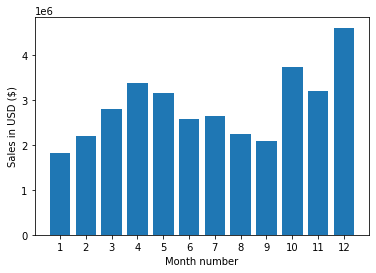

In [10]:
months = range(1,13)
plt.bar(months, sale_data.groupby(["Month"]).sum()["Sales"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [11]:
sale_data.groupby(["City"]).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


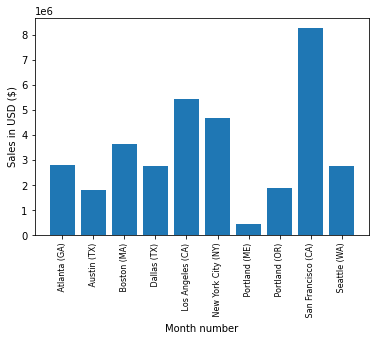

In [12]:
cities = [ city for city, i in sale_data.groupby(["City"])]

plt.bar(cities, sale_data.groupby(["City"]).sum()["Sales"])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [13]:
sale_data["Order Date"] = pd.to_datetime(sale_data["Order Date"])

In [14]:
sale_data["Hour"] = pd.to_datetime(sale_data["Order Date"]).dt.hour
sale_data["Minute"] = pd.to_datetime(sale_data["Order Date"]).dt.minute
sale_data["Count"] = 1

sale_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


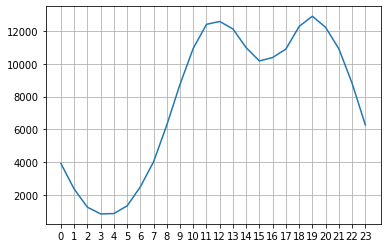

In [21]:
hours = [ h for h, df in sale_data.groupby(["Hour"])]

plt.plot(hours, sale_data.groupby(["Hour"]).count()["Count"])
plt.xticks(hours)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [26]:
df = sale_data[sale_data['Order ID'].duplicated(keep=False)]

df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ','.join(x))

df2 = df[["Order ID","Grouped"]].drop_duplicates()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\429980703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ','.join(x))


In [27]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

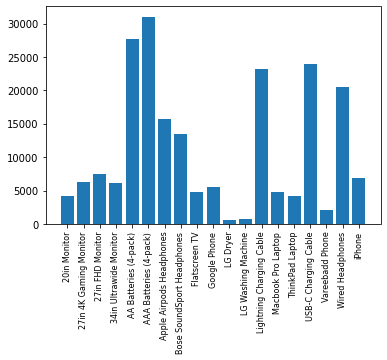

In [34]:
product_group = sale_data.groupby('Product')
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [ p for p,i in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical", size=8)
plt.show()

In [36]:
prices = sale_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64